# Introduction to Pandas through a financial example

## Preliminaries

In [1]:
import pandas as pd


There are two main objects in pandas, the **DataFrame** and the **Series**

In [2]:
pd.DataFrame() # Empty dataframe

""


In [3]:
# A DataFrame is a table, you can construct one using a dictionary with arrays as values

df = pd.DataFrame({'column1' : [1, 2], 'column2' : [3, 4]})
df

,column1,column2
0,1,3
1,2,4


In [4]:
# Strings can also appear in the table
df = pd.DataFrame({'company' : ['apple', 'tesla'], 'profits' : [1e12, 1e8]})
df

,company,profits
0,apple,1.000000e+12
1,tesla,1.000000e+08


In [5]:
# We can assign values to the index in the table
df = pd.DataFrame( {'returns' : [0.01, 0.05, 0.12], 'volume' : [1e5, 1e6, 2e5]}, index = ['Apple', 'Microsoft', 'Tesla'])
df

,returns,volume
Apple,0.01,100000.0
Microsoft,0.05,1000000.0
Tesla,0.12,200000.0


A **Series** is a sequence of data values

In [6]:
import numpy as np
s = pd.Series(np.random.rand(100))
s

0     0.823805
1     0.942914
2     0.514213
3     0.498596
4     0.082836
        ...   
95    0.724463
96    0.708379
97    0.784135
98    0.179109
99    0.092896
Length: 100, dtype: float64

In [7]:
s = pd.Series([1,2,3], index =['2015 Sales', '2016 Sales', '2017 Sales'], name = 'Product A')
s

2015 Sales    1
2016 Sales    2
2017 Sales    3
Name: Product A, dtype: int64

## Reading DataFiles

In [8]:
df = pd.read_csv('https://www.sec.gov/include/ticker.txt', delimiter = '\t', header = None)
df = df.rename(columns = {0 : 'ticker', 1 : 'cik'})

df.head()

,ticker,cik
0,aapl,320193
1,msft,789019
2,brk-b,1067983
3,unh,731766
4,jnj,200406


## Indexing, Selecting, and Assigning

In [9]:
df.cik

0         320193
1         789019
2        1067983
3         731766
4         200406
          ...   
12079    1829455
12080    1829455
12081      46207
12082      49196
12083      49196
Name: cik, Length: 12084, dtype: int64

In [10]:
df['ticker']

0         aapl
1         msft
2        brk-b
3          unh
4          jnj
         ...  
12079    hcicu
12080    hcicw
12081    hawlm
12082    hbanm
12083    hbanp
Name: ticker, Length: 12084, dtype: object

In [11]:
df['ticker'][0]

'aapl'

## Indexing

In [12]:
df.iloc[0] # Index based selection

ticker      aapl
cik       320193
Name: 0, dtype: object

In [13]:
df.iloc[:, 0]

0         aapl
1         msft
2        brk-b
3          unh
4          jnj
         ...  
12079    hcicu
12080    hcicw
12081    hawlm
12082    hbanm
12083    hbanp
Name: ticker, Length: 12084, dtype: object

In [14]:
df.iloc[:3, 1]

0     320193
1     789019
2    1067983
Name: cik, dtype: int64

In [15]:
df.iloc[0,0]

'aapl'

In [16]:
df.loc[0, 'cik'] # Label based selection

320193

## Conditional Selection

In [17]:
df.ticker == 'msft'

0        False
1         True
2        False
3        False
4        False
         ...  
12079    False
12080    False
12081    False
12082    False
12083    False
Name: ticker, Length: 12084, dtype: bool

In [18]:
df.loc[df.ticker == 'msft'] #loc accepts a conditional

,ticker,cik
1,msft,789019


In [20]:
mask = (df.ticker =='msft') | (df.ticker == 'aapl') # You have to use the more abstract or | operator or the more abstract & and operators
df.loc[mask]

,ticker,cik
0,aapl,320193
1,msft,789019


In [21]:
df.loc[df.ticker.isin(['aapl', 'msft', 'tsla'])]

,ticker,cik
0,aapl,320193
1,msft,789019
16,tsla,1318605


In [22]:
mask = df.cik.notnull()
df.loc[mask]

,ticker,cik
0,aapl,320193
1,msft,789019
2,brk-b,1067983
3,unh,731766
4,jnj,200406
...,...,...
12079,hcicu,1829455
12080,hcicw,1829455
12081,hawlm,46207
12082,hbanm,49196


In [23]:
df['new_column'] = 'some value'
df.head()

,ticker,cik,new_column
0,aapl,320193,some value
1,msft,789019,some value
2,brk-b,1067983,some value
3,unh,731766,some value
4,jnj,200406,some value


In [24]:
df.new_column = np.arange(len(df.ticker))
df.head()

,ticker,cik,new_column
0,aapl,320193,0
1,msft,789019,1
2,brk-b,1067983,2
3,unh,731766,3
4,jnj,200406,4


## Functions and maps

In [25]:
df = pd.read_csv('https://theunitedstates.io/congress-legislators/legislators-current.csv')
df.head()

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.


In [26]:
df.last_name.describe()

count         539
unique        491
top       Johnson
freq            6
Name: last_name, dtype: object

### Apply a function to all the elements in a column

In [27]:
df['year_birthday'] = df.birthday.apply(lambda x : int(x[:4]))
df.year_birthday.head()

0    1952
1    1958
2    1943
3    1947
4    1960
Name: year_birthday, dtype: int64

In [28]:
# Quick available functions
mean = df.year_birthday.mean()
std   = df.year_birthday.std()

In [29]:
df.last_name.unique()

array(['Brown', 'Cantwell', 'Cardin', 'Carper', 'Casey', 'Feinstein',
       'Klobuchar', 'Menendez', 'Sanders', 'Stabenow', 'Tester',
       'Whitehouse', 'Barrasso', 'Wicker', 'Collins', 'Cornyn', 'Durbin',
       'Graham', 'Inhofe', 'McConnell', 'Merkley', 'Reed', 'Risch',
       'Shaheen', 'Warner', 'Gillibrand', 'Coons', 'Manchin', 'Aderholt',
       'Baldwin', 'Bass', 'Bennet', 'Bilirakis', 'Bishop', 'Blackburn',
       'Blumenauer', 'Blumenthal', 'Blunt', 'Boozman', 'Brady', 'Brooks',
       'Buchanan', 'Bucshon', 'Burgess', 'Burr', 'Butterfield', 'Calvert',
       'Capito', 'Carson', 'Carter', 'Cassidy', 'Castor', 'Chabot', 'Chu',
       'Cicilline', 'Clarke', 'Cleaver', 'Clyburn', 'Cohen', 'Cole',
       'Connolly', 'Cooper', 'Costa', 'Courtney', 'Crapo', 'Crawford',
       'Cuellar', 'Davis', 'DeFazio', 'DeGette', 'DeLauro', 'DesJarlais',
       'Deutch', 'Diaz-Balart', 'Doggett', 'Doyle', 'Duncan', 'Eshoo',
       'Fleischmann', 'Foxx', 'Garamendi', 'Gibbs', 'Gohmert', 'Gosa

In [30]:
df.last_name.value_counts()

Johnson        6
Scott          5
Smith          5
Kelly          4
Brown          3
              ..
Schiff         1
Schakowsky     1
Scalise        1
Sarbanes       1
Sempolinski    1
Name: last_name, Length: 491, dtype: int64

In [31]:
s = df.birthday.map(lambda x : int(x[:4])) # Map does the same job as apply, but returns a series
type(s)

pandas.core.series.Series

## Grouping and Sorting

In [32]:
df.groupby('last_name') # Returns an object easier to iterate

In [33]:
df.groupby('last_name').last_name.count()

last_name
Adams       1
Aderholt    1
Aguilar     1
Allen       1
Allred      1
           ..
Womack      1
Wyden       1
Yarmuth     1
Young       1
Zeldin      1
Name: last_name, Length: 491, dtype: int64

In [34]:
df.groupby('last_name').year_birthday.min()

last_name
Adams       1946
Aderholt    1965
Aguilar     1979
Allen       1951
Allred      1983
            ... 
Womack      1957
Wyden       1949
Yarmuth     1947
Young       1972
Zeldin      1980
Name: year_birthday, Length: 491, dtype: int64

In [35]:
df.groupby('state').state.count()

state
AK     3
AL     9
AR     6
AS     1
AZ    11
CA    55
CO     9
CT     7
DC     1
DE     3
FL    28
GA    16
GU     1
HI     4
IA     6
ID     4
IL    20
IN    10
KS     6
KY     8
LA     8
MA    11
MD    10
ME     4
MI    16
MN    10
MO    10
MP     1
MS     6
MT     3
NC    15
ND     3
NE     5
NH     4
NJ    14
NM     5
NV     6
NY    29
OH    18
OK     7
OR     7
PA    20
PR     1
RI     4
SC     9
SD     3
TN    11
TX    38
UT     6
VA    13
VI     1
VT     3
WA    12
WI    10
WV     5
WY     3
Name: state, dtype: int64

In [36]:
df.groupby('state').apply(lambda x : x.last_name.iloc[0]) # First congressman per state

state
AK         Murkowski
AL          Aderholt
AR           Boozman
AS         Radewagen
AZ             Gosar
CA         Feinstein
CO            Bennet
CT        Blumenthal
DC            Norton
DE            Carper
FL         Bilirakis
GA            Bishop
GU       San Nicolas
HI            Hirono
IA          Grassley
ID             Risch
IL            Durbin
IN           Bucshon
KS             Moran
KY         McConnell
LA           Cassidy
MA           Keating
MD            Cardin
ME           Collins
MI          Stabenow
MN         Klobuchar
MO             Blunt
MP            Sablan
MS            Wicker
MT            Tester
NC              Burr
ND            Hoeven
NE             Smith
NH           Shaheen
NJ          Menendez
NM          Heinrich
NV            Amodei
NY        Gillibrand
OH             Brown
OK            Inhofe
OR           Merkley
PA             Casey
PR    González-Colón
RI        Whitehouse
SC            Graham
SD             Thune
TN         Blackburn
TX     

In [37]:
# What about the first one alphabetically?
df = df.sort_values(['state', 'last_name'])

df.groupby('state').apply(lambda x : x.last_name.iloc[0])

state
AK          Murkowski
AL           Aderholt
AR            Boozman
AS          Radewagen
AZ              Biggs
CA            Aguilar
CO             Bennet
CT         Blumenthal
DC             Norton
DE    Blunt Rochester
FL          Bilirakis
GA              Allen
GU        San Nicolas
HI               Case
IA               Axne
ID              Crapo
IL               Bost
IN              Baird
KS             Davids
KY               Barr
LA             Carter
MA        Auchincloss
MD              Brown
ME            Collins
MI            Bergman
MN              Craig
MO              Blunt
MP             Sablan
MS              Guest
MT             Daines
NC              Adams
ND          Armstrong
NE              Bacon
NH             Hassan
NJ             Booker
NM           Heinrich
NV             Amodei
NY             Bowman
OH          Balderson
OK               Bice
OR              Bentz
PA              Boyle
PR     González-Colón
RI          Cicilline
SC            Clyburn
SD  

In [38]:
print(df.head())

df = df.reset_index()

     last_name first_name middle_name suffix nickname             full_name  \
142  Murkowski       Lisa          A.    NaN      NaN        Lisa Murkowski   
536    Peltola       Mary     Sattler    NaN      NaN  Mary Sattler Peltola   
306   Sullivan        Dan         NaN    NaN      NaN          Dan Sullivan   
28    Aderholt     Robert          B.    NaN      NaN    Robert B. Aderholt   
40      Brooks         Mo         NaN    NaN      NaN             Mo Brooks   

       birthday gender type state  ...  lis_id    fec_ids   cspan_id  \
142  1957-05-22      F  sen    AK  ...    S288  S4AK00099  1004138.0   
536  1973-08-31      F  rep    AK  ...     NaN  H2AK01158        NaN   
306  1964-11-13      M  sen    AK  ...    S383  S4AK00214  1023262.0   
28   1965-07-22      M  rep    AL  ...     NaN  H6AL04098    45516.0   
40   1954-04-29      M  rep    AL  ...     NaN  H0AL05163    94888.0   

    govtrack_id votesmart_id      ballotpedia_id washington_post_id icpsr_id  \
142      300

In [39]:
df.head()

,index,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,...,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,year_birthday
0,142,Murkowski,Lisa,A.,NaN,NaN,Lisa Murkowski,1957-05-22,F,sen,...,S288,S4AK00099,1004138.0,300075,15841.0,Lisa Murkowski,NaN,40300.0,Lisa Murkowski,1957
1,536,Peltola,Mary,Sattler,NaN,NaN,Mary Sattler Peltola,1973-08-31,F,rep,...,NaN,H2AK01158,NaN,456870,NaN,Mary Peltola,NaN,NaN,Mary Peltola,1973
2,306,Sullivan,Dan,NaN,NaN,NaN,Dan Sullivan,1964-11-13,M,sen,...,S383,S4AK00214,1023262.0,412665,114964.0,Daniel S. Sullivan,NaN,41500.0,Dan Sullivan (U.S. senator),1964
3,28,Aderholt,Robert,B.,NaN,NaN,Robert B. Aderholt,1965-07-22,M,rep,...,NaN,H6AL04098,45516.0,400004,441.0,Robert B. Aderholt,NaN,29701.0,Robert Aderholt,1965
4,40,Brooks,Mo,NaN,NaN,NaN,Mo Brooks,1954-04-29,M,rep,...,NaN,H0AL05163,94888.0,412395,121610.0,Mo Brooks,NaN,21193.0,Mo Brooks,1954


### Aggregation

In [40]:
df.groupby('state').year_birthday.agg([len, min, max, np.mean, np.std])

,len,min,max,mean,std
state,,,,,
AK,3,1957,1973,1964.666667,8.020806
AL,9,1934,1966,1956.444444,9.773831
AR,6,1950,1977,1962.166667,9.703951
AS,1,1947,1947,1947.000000,NaN
AZ,11,1946,1979,1960.818182,10.870310
CA,55,1933,1989,1959.636364,13.427947
CO,9,1952,1986,1965.333333,13.838353
CT,7,1943,1973,1957.428571,12.946777
DC,1,1937,1937,1937.000000,NaN


In [41]:
df = df.drop(['index'], axis=1)


In [42]:
df.head()

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,year_birthday
0,Murkowski,Lisa,A.,NaN,NaN,Lisa Murkowski,1957-05-22,F,sen,AK,...,S288,S4AK00099,1004138.0,300075,15841.0,Lisa Murkowski,NaN,40300.0,Lisa Murkowski,1957
1,Peltola,Mary,Sattler,NaN,NaN,Mary Sattler Peltola,1973-08-31,F,rep,AK,...,NaN,H2AK01158,NaN,456870,NaN,Mary Peltola,NaN,NaN,Mary Peltola,1973
2,Sullivan,Dan,NaN,NaN,NaN,Dan Sullivan,1964-11-13,M,sen,AK,...,S383,S4AK00214,1023262.0,412665,114964.0,Daniel S. Sullivan,NaN,41500.0,Dan Sullivan (U.S. senator),1964
3,Aderholt,Robert,B.,NaN,NaN,Robert B. Aderholt,1965-07-22,M,rep,AL,...,NaN,H6AL04098,45516.0,400004,441.0,Robert B. Aderholt,NaN,29701.0,Robert Aderholt,1965
4,Brooks,Mo,NaN,NaN,NaN,Mo Brooks,1954-04-29,M,rep,AL,...,NaN,H0AL05163,94888.0,412395,121610.0,Mo Brooks,NaN,21193.0,Mo Brooks,1954


### Data types **Dtypes**

In [43]:
df.year_birthday.dtype

dtype('int64')

In [44]:
df.dtypes #One peculiarity to keep in mind (and on display very clearly here) is that columns consisting entirely of 
          # strings do not get their own type; they are instead given the object type.

last_name              object
first_name             object
middle_name            object
suffix                 object
nickname               object
full_name              object
birthday               object
gender                 object
type                   object
state                  object
district              float64
senate_class          float64
party                  object
url                    object
address                object
phone                  object
contact_form           object
rss_url                object
twitter                object
facebook               object
youtube                object
youtube_id             object
bioguide_id            object
thomas_id             float64
opensecrets_id         object
lis_id                 object
fec_ids                object
cspan_id              float64
govtrack_id             int64
votesmart_id          float64
ballotpedia_id         object
washington_post_id    float64
icpsr_id              float64
wikipedia_

In [45]:
df.year_birthday.astype('float64')

0      1957.0
1      1973.0
2      1964.0
3      1965.0
4      1954.0
        ...  
534    1950.0
535    1971.0
536    1952.0
537    1966.0
538    1954.0
Name: year_birthday, Length: 539, dtype: float64

In [46]:
df.year_birthday.astype('float32')

0      1957.0
1      1973.0
2      1964.0
3      1965.0
4      1954.0
        ...  
534    1950.0
535    1971.0
536    1952.0
537    1966.0
538    1954.0
Name: year_birthday, Length: 539, dtype: float32

### Missing Data

In [47]:
df[~pd.isnull(df.twitter)] # Keep only does ones that have a twitter account, recall the ~ for the negation

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,year_birthday
0,Murkowski,Lisa,A.,NaN,NaN,Lisa Murkowski,1957-05-22,F,sen,AK,...,S288,S4AK00099,1004138.0,300075,15841.0,Lisa Murkowski,NaN,40300.0,Lisa Murkowski,1957
2,Sullivan,Dan,NaN,NaN,NaN,Dan Sullivan,1964-11-13,M,sen,AK,...,S383,S4AK00214,1023262.0,412665,114964.0,Daniel S. Sullivan,NaN,41500.0,Dan Sullivan (U.S. senator),1964
3,Aderholt,Robert,B.,NaN,NaN,Robert B. Aderholt,1965-07-22,M,rep,AL,...,NaN,H6AL04098,45516.0,400004,441.0,Robert B. Aderholt,NaN,29701.0,Robert Aderholt,1965
4,Brooks,Mo,NaN,NaN,NaN,Mo Brooks,1954-04-29,M,rep,AL,...,NaN,H0AL05163,94888.0,412395,121610.0,Mo Brooks,NaN,21193.0,Mo Brooks,1954
5,Carl,Jerry,Lee,Jr.,NaN,Jerry L. Carl,1958-06-17,M,rep,AL,...,NaN,H0AL01055,NaN,456799,NaN,NaN,NaN,NaN,Jerry Carl,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Miller,Carol,D.,NaN,NaN,Carol D. Miller,1950-11-04,F,rep,WV,...,NaN,H8WV03097,NaN,412837,52123.0,Carol Miller (West Virginia),NaN,21946.0,Carol Miller (politician),1950
535,Mooney,Alexander,X.,NaN,NaN,Alexander Mooney,1971-06-05,M,rep,WV,...,NaN,H4WV02080,76588.0,412662,145943.0,Alexander Mooney,NaN,21557.0,Alex Mooney,1971
536,Barrasso,John,A.,NaN,NaN,John Barrasso,1952-07-21,M,sen,WY,...,S317,S6WY00068,1024777.0,412251,52662.0,John Barrasso,NaN,40707.0,John Barrasso,1952
537,Cheney,Liz,NaN,NaN,NaN,Liz Cheney,1966-07-28,F,rep,WY,...,NaN,H6WY00159,86147.0,412732,171319.0,Liz Cheney,NaN,21710.0,Liz Cheney,1966


In [58]:
df.twitter.fillna('@Congressdotgov')

AttributeError: ignored

In [57]:
df.twitter.replace('@Congressdotgov', '')

AttributeError: ignored

## Renaming and Combining

In [ ]:
df.rename(columns = {'last_name' : 'lastname'})

,lastname,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,year_birthday
0,Murkowski,Lisa,A.,NaN,NaN,Lisa Murkowski,1957-05-22,F,sen,AK,...,S288,S4AK00099,1004138.0,300075,15841.0,Lisa Murkowski,NaN,40300.0,Lisa Murkowski,1957
1,Sullivan,Dan,NaN,NaN,NaN,Dan Sullivan,1964-11-13,M,sen,AK,...,S383,S4AK00214,1023262.0,412665,114964.0,Daniel S. Sullivan,NaN,41500.0,Dan Sullivan (U.S. senator),1964
2,Young,Don,E.,NaN,NaN,Don Young,1933-06-09,M,rep,AK,...,NaN,H6AK00045,1897.0,400440,26717.0,Don Young,NaN,14066.0,Don Young,1933
3,Aderholt,Robert,B.,NaN,NaN,Robert B. Aderholt,1965-07-22,M,rep,AL,...,NaN,H6AL04098,45516.0,400004,441.0,Robert B. Aderholt,NaN,29701.0,Robert Aderholt,1965
4,Brooks,Mo,NaN,NaN,NaN,Mo Brooks,1954-04-29,M,rep,AL,...,NaN,H0AL05163,94888.0,412395,121610.0,Mo Brooks,NaN,21193.0,Mo Brooks,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Miller,Carol,D.,NaN,NaN,Carol D. Miller,1950-11-04,F,rep,WV,...,NaN,H8WV03097,NaN,412837,52123.0,Carol Miller (West Virginia),NaN,21946.0,Carol Miller (politician),1950
534,Mooney,Alexander,X.,NaN,NaN,Alexander Mooney,1971-06-05,M,rep,WV,...,NaN,H4WV02080,76588.0,412662,145943.0,Alexander Mooney,NaN,21557.0,Alex Mooney,1971
535,Barrasso,John,A.,NaN,NaN,John Barrasso,1952-07-21,M,sen,WY,...,S317,S6WY00068,1024777.0,412251,52662.0,John Barrasso,NaN,40707.0,John Barrasso,1952
536,Cheney,Liz,NaN,NaN,NaN,Liz Cheney,1966-07-28,F,rep,WY,...,NaN,H6WY00159,86147.0,412732,171319.0,Liz Cheney,NaN,21710.0,Liz Cheney,1966


### Combining

In [ ]:
import string
import random
N = 10
random.seed(999)
letters = string.ascii_lowercase
df1 = pd.DataFrame({'name' : [''.join([random.choice(letters) for j in range(5)]) for i in range(N)] })
df2 = pd.DataFrame({'name' : [''.join([random.choice(letters) for j in range(5)]) for i in range(N)] })
df1['value'] = np.random.rand(N)
df2['value'] = np.random.rand(N)
df1.head()

,name,value
0,zvcss,0.019464
1,rppez,0.291424
2,ukuzu,0.594172
3,dugei,0.967554
4,sbwyi,0.489812


In [ ]:
pd.concat([df1, df2])

,name,value
0,zvcss,0.190717
1,rppez,0.835728
2,ukuzu,0.439343
3,dugei,0.370914
4,sbwyi,0.874071
5,mzhum,0.032592
6,ciagu,0.007039
7,qgfvk,0.685719
8,fcrto,0.778722
9,wxlev,0.565175


In [ ]:
# A similar method, assuming columns are the same
df1.append(df2)

,name,value
0,zvcss,0.019464
1,rppez,0.291424
2,ukuzu,0.594172
3,dugei,0.967554
4,sbwyi,0.489812
5,mzhum,0.427163
6,ciagu,0.450189
7,qgfvk,0.735147
8,fcrto,0.646644
9,wxlev,0.348503


In [ ]:
df1 = pd.DataFrame({'name' : ['Ana', 'Bob', 'Claire', 'David', 'Eric', 'Filippo'], 
               'last_name' : ['Anason', 'Bobson', 'Claireson', 'Davidson', 'Ericson', 'Filippson'], 
               'location'  : ['Atlanta', 'Boston', 'Boston', 'Denver', 'Eastvale', 'Fort Collins'],
               'age'       : [18, 17, 21, 25, 22, 34]})
df2 = pd.DataFrame({'location'   :  ['Atlanta', 'Boston', 'Cleveland', 'Denver', 'Eastvale', 'Fort Lauderdale'], 
                    'population' :  [488800, 684379, 385282, 705576, 62046, 183109]})

print('Inner join')
print(df1.merge(df2, on='location')) # Inner merge, keys on both sides
print()
print('Left Join')
print(df1.merge(df2, on='location', how = 'left' ))
print()
print('Right Join')
print(df1.merge(df2, on='location', how = 'right' ))

Inner join
     name  last_name  location  age  population
0     Ana     Anason   Atlanta   18      488800
1     Bob     Bobson    Boston   17      684379
2  Claire  Claireson    Boston   21      684379
3   David   Davidson    Denver   25      705576
4    Eric    Ericson  Eastvale   22       62046

Left Join
      name  last_name      location  age  population
0      Ana     Anason       Atlanta   18    488800.0
1      Bob     Bobson        Boston   17    684379.0
2   Claire  Claireson        Boston   21    684379.0
3    David   Davidson        Denver   25    705576.0
4     Eric    Ericson      Eastvale   22     62046.0
5  Filippo  Filippson  Fort Collins   34         NaN

Right Join
     name  last_name         location   age  population
0     Ana     Anason          Atlanta  18.0      488800
1     Bob     Bobson           Boston  17.0      684379
2  Claire  Claireson           Boston  21.0      684379
3     NaN        NaN        Cleveland   NaN      385282
4   David   Davidson       

# Example: Financial Disclosures

1. The Security and Exchanges Comission is the authority whose mission is ***to protect investors; maintain fair, orderly, and efficient markets; and facilitate capital formation***. 

2. Companies trading in the major U.S. Stock Exchanges (NYSE, Nasdaq, AMEX) are required to disclose information for regulatory and transparency purposes. 

3. Information is disclosed through exhibits in financial reports, and nowadays is organized, presented, and retrieved using eXtensible Business Reporting Language (XBRL), a variation of the Extensible Markup Language (XML).

4. Most of this information is publicly available through EDGAR,  the Electronic Data Gathering, Analysis, and Retrieval system, is the primary system for companies and others submitting documents under the Securities Act of 1933, the Securities Exchange Act of 1934, the Trust Indenture Act of 1939, and the Investment Company Act of 1940.

5. To facilitate analysis, the SEC compiles quarterly information on the balance sheets, statements of cash flows, and P&L, available at https://www.sec.gov/dera/data/financial-statement-data-sets.html

6. This notebook introduces *Pandas* using this information

## Downloading Data

Ideally you would always like to automatize any mechanical process, including downloading data. This allows you to easily update to the most recent data when available. 

In [64]:
# Required libraries
!pip install requests
!pip install zipfile36
!pip install pandas
import requests
import zipfile
import os
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# Path to where the data will be stored

PATH_TO_SEC_DATA = r''

In [65]:
def download_zip_sec(url, save_path, chunk_size):
    """Given an url that contains a zip file, downloads the file and stores it at PATH_TO_SEC_DATA
    and unzips its content. For efficiency when dealing large files it splits it into chunks.         
    """
    try:
        r = requests.get(url, stream=True)
        with open(save_path, 'wb') as fd:
            for chunk in r.iter_content(chunk_size=chunk_size):
                fd.write(chunk)

        with zipfile.ZipFile(save_path, 'r') as zip_ref:
            zip_ref.extractall(save_path.replace(".zip",""))

        os.remove(save_path)
        print(f"Financial Data from {url} downloaded...")
    except:
        pass

In [66]:
def download_url_sec(y, q, chunk_size=128):
    """ Downloads zip file given year and quarter
    """
    save_path=f"{PATH_TO_SEC_DATA}/sec{y}{q}.zip"
    url = f"https://www.sec.gov/files/dera/data/financial-statement-data-sets/{y}q{q}.zip"
    download_zip_sec(url, save_path, chunk_size)
   

We will use the data from the second quarter of 2021

In [67]:
y = 2021 
q = 2
download_url_sec(y,q)

Financial Data from https://www.sec.gov/files/dera/data/financial-statement-data-sets/2021q2.zip downloaded...


In [69]:
main_path

'sec20212'

In [71]:
main_path=os.path.join(PATH_TO_SEC_DATA, f"sec{y}{q}")
assert os.path.exists(f"/{main_path}")# Makes sure the folder exists
# Read data
num = pd.read_csv(os.path.join(f"/{main_path}", "num.txt"), sep="\t", low_memory=False)
sub = pd.read_csv(os.path.join(f"/{main_path}", "sub.txt"), sep="\t", low_memory=False)
tag = pd.read_csv(os.path.join(f"/{main_path}", "tag.txt"), sep="\t", low_memory=False)

In [72]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

## Understand the data

In [73]:
type(num)

pandas.core.frame.DataFrame

In [74]:
num.head()

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote
0,0001640334-21-000798,AccountsPayableAndAccruedLiabilitiesCurrent,us-gaap/2019,NaN,20210131,0,USD,10010.0,NaN
1,0001640334-21-000798,AccountsPayableAndAccruedLiabilitiesCurrent,us-gaap/2019,NaN,20201031,0,USD,10913.0,NaN
2,0001477932-21-002126,AccountsPayableAndAccruedLiabilitiesCurrent,us-gaap/2019,NaN,20201231,0,USD,2372072.0,NaN
3,0001477932-21-002126,AccountsPayableAndAccruedLiabilitiesCurrent,us-gaap/2019,NaN,20191231,0,USD,1018145.0,NaN
4,0001640334-21-000810,AccountsPayableAndAccruedLiabilitiesCurrent,us-gaap/2019,NaN,20210228,0,USD,2974.0,NaN


In [ ]:
sub.head(10)

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000009389-21-000078,9389,BALL CORP,3411.0,US,CO,WESTMINSTER,80021,9200 W. 108TH CIRCLE,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 10:49:00.0,0,0,bll-20210401x8k_htm.xml,1,NaN
1,0000037996-21-000020,37996,FORD MOTOR CO,3711.0,US,MI,DEARBORN,48126,ONE AMERICAN ROAD,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 15:38:00.0,0,0,f-20210401_htm.xml,1,NaN
2,0000038009-21-000033,38009,FORD MOTOR CREDIT CO LLC,6159.0,US,MI,DEARBORN,48126,ONE AMERICAN ROAD,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 16:49:00.0,0,0,fmcc-20210401_htm.xml,1,NaN
3,0000038725-21-000080,38725,FRANKLIN ELECTRIC CO INC,3621.0,US,IN,FORT WAYNE,46809,9255 COVERDALE ROAD,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 15:03:00.0,0,0,fele-20210401_htm.xml,1,NaN
4,0000048732-21-000004,48732,CENTERPOINT ENERGY HOUSTON ELECTRIC LLC,4911.0,US,TX,HOUSTON,77002,1111 LOUISIANA,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 16:35:00.0,0,0,cehe-20210401_htm.xml,1,NaN
5,0000064996-21-000015,64996,MERCURY GENERAL CORP,6331.0,US,CA,LOS ANGELES,90010,4484 WILSHIRE BLVD,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 16:17:00.0,0,0,mcy-20210331_htm.xml,1,NaN
6,0000065984-21-000162,1348952,"ENTERGY LOUISIANA, LLC",4911.0,US,LA,JEFFERSON,70121,4809 JEFFERSON HIGHWAY,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 13:13:00.0,0,0,etr-20210401_htm.xml,1,NaN
7,0000072903-21-000014,72903,XCEL ENERGY INC,4931.0,US,MN,MINNEAPOLIS,55401,414 NICOLLET MALL,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 10:21:00.0,0,0,xel-20210331_htm.xml,2,81018
8,0000073088-21-000080,73088,NORTHWESTERN CORP,4931.0,US,SD,SIOUX FALLS,57108,3010 W 69TH STREET,NaN,...,20210331.0,NaN,NaN,20210401,2021-04-01 12:03:00.0,0,0,nwe-20210326_htm.xml,1,NaN
9,0000092103-21-000007,92103,SOUTHERN CALIFORNIA EDISON CO,4911.0,US,CA,ROSEMEAD,91770,2244 WALNUT GROVE AVE,P O BOX 800,...,20210331.0,NaN,NaN,20210401,2021-04-01 16:06:00.0,0,0,sce-20210324x8k_htm.xml,1,NaN


In [ ]:
tag.tail(8)

,tag,version,custom,abstract,datatype,iord,crdr,tlabel,doc
118120,SharesIssuedForCash,0001213900-21-035102,1,0,monetary,D,C,SharesIssuedForCash,NaN
118121,SharesIssuedForDebt,0001213900-21-035102,1,0,monetary,D,D,SharesIssuedForDebt,Shares issued for debt.
118122,SharesIssuedOnAcquisition,0001213900-21-035102,1,0,shares,D,NaN,SharesIssuedOnAcquisition,Shares issued on acquisition.
118123,SharesIssuedOnAcquisitionOfSignifi,0001213900-21-035102,1,0,monetary,D,C,SharesIssuedOnAcquisitionOfSignifi,Shares issued on acquisition.
118124,TradeAndOtherReceivablesPrepaidsAndAdvancesToS...,0001213900-21-035102,1,0,monetary,D,C,TradeAndOtherReceivablesPrepaidsAndAdvancesToS...,NaN
118125,TransactionCostsNote22,0001213900-21-035102,1,0,monetary,D,D,TransactionCostsNote22,NaN
118126,TranslationAdjustment,0001213900-21-035102,1,0,monetary,D,D,TranslationAdjustment,NaN
118127,WeightedAverageShare,0001213900-21-035102,1,0,shares,D,NaN,WeightedAverageShare,NaN


In [ ]:
# Column names
num.columns

Index(['adsh', 'tag', 'version', 'coreg', 'ddate', 'qtrs', 'uom', 'value',
       'footnote'],
      dtype='object')

In [ ]:
# Loop through column names
for col_name in num.columns:
    print(col_name)

adsh
tag
version
coreg
ddate
qtrs
uom
value
footnote


In [ ]:
# Columns can be obtained like a dictionary
# adsh, a 20 character EDGAR Accession Number with dashes in positions 11 and 14. 2
num['adsh'] # Prints index and column value

0          0001640334-21-000798
1          0001640334-21-000798
2          0001477932-21-002126
3          0001477932-21-002126
4          0001640334-21-000810
                   ...         
2441785    0001213900-21-035102
2441786    0001213900-21-035102
2441787    0001213900-21-035102
2441788    0001213900-21-035102
2441789    0001213900-21-035102
Name: adsh, Length: 2441790, dtype: object

In [ ]:
# Companies are identified by the Central Index Key (CIK)
sub['cik']

0           9389
1          37996
2          38009
3          38725
4          48732
          ...   
20689    1698832
20690    1745797
20691    1759655
20692    1818874
20693    1831631
Name: cik, Length: 20694, dtype: int64

In [ ]:
num=num[(num.qtrs == 0) | (num.qtrs == 1) | (num.qtrs == 4)] # Keep only balance sheet, and P&L information

In [ ]:
# Distribution of accounts, what do companies disclose?
from collections import Counter
subset = 10
most_common = Counter(num['tag']).most_common(subset)
for mc in most_common:
    print(f"{mc[0]} => {mc[1]}")
accounts = [mc[0] for mc in most_common]


StockholdersEquity => 24752
CashAndCashEquivalentsAtCarryingValue => 17557
NetIncomeLoss => 16848
Assets => 16585
LiabilitiesAndStockholdersEquity => 15595
CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents => 15498
RetainedEarningsAccumulatedDeficit => 15090
Liabilities => 14405
NetCashProvidedByUsedInOperatingActivities => 13519
NetCashProvidedByUsedInFinancingActivities => 13040


In [ ]:
# Merge data
num=num[num.tag.isin(accounts)]
# now we merge (inner join e.g. keep if _merge==3 in Stata) with sub
df = pd.merge(num,sub,on='adsh')
df.head()

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote,cik,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0001477932-21-001972,Assets,us-gaap/2019,NaN,20200331,0,USD,237359.0,NaN,1580262,...,20200331.0,2019.0,FY,20210401,2021-04-01 15:08:00.0,0,1,rton-20200331.xml,1,NaN
1,0001477932-21-001972,Assets,us-gaap/2019,NaN,20190331,0,USD,357243.0,NaN,1580262,...,20200331.0,2019.0,FY,20210401,2021-04-01 15:08:00.0,0,1,rton-20200331.xml,1,NaN
2,0001477932-21-001972,CashAndCashEquivalentsAtCarryingValue,us-gaap/2019,NaN,20180331,0,USD,47506.0,NaN,1580262,...,20200331.0,2019.0,FY,20210401,2021-04-01 15:08:00.0,0,1,rton-20200331.xml,1,NaN
3,0001477932-21-001972,CashAndCashEquivalentsAtCarryingValue,us-gaap/2019,NaN,20190331,0,USD,90883.0,NaN,1580262,...,20200331.0,2019.0,FY,20210401,2021-04-01 15:08:00.0,0,1,rton-20200331.xml,1,NaN
4,0001477932-21-001972,CashAndCashEquivalentsAtCarryingValue,us-gaap/2019,NaN,20200331,0,USD,67153.0,NaN,1580262,...,20200331.0,2019.0,FY,20210401,2021-04-01 15:08:00.0,0,1,rton-20200331.xml,1,NaN


In [ ]:
# Columns can also be accessed after .
df.accepted = df.accepted.apply(lambda x : x[:-11]) # Remove the time of the date in the accepted date

# Keep only relevant variables
relevant_variables=['cik', 'ddate', 'tag', 'value', 'qtrs', 'accepted', 'sic']
df=df[relevant_variables]

Datetime functions

In [ ]:
df['t_day']=pd.to_datetime(df.accepted, format='%Y-%m-%d')

In [ ]:
# Info is only available to the public until next day of being accepted
!pip install datetime
from datetime import datetime, timedelta
df['t_day']=df['t_day']+timedelta(days=1)

In [ ]:
# Sort
df=df.sort_values(['cik','tag', 't_day', 'ddate'])

In [ ]:
df=df.groupby(['cik', 'tag', 't_day']).tail(1) # Keep the most recent observation for every account

In [ ]:
df.head()

,cik,ddate,tag,value,qtrs,accepted,sic,t_day
41750,1800,20210331,Assets,7.278500e+10,0,2021-05-05,2834.0,2021-05-06
41752,1800,20210331,CashAndCashEquivalentsAtCarryingValue,8.054000e+09,0,2021-05-05,2834.0,2021-05-06
41740,1800,20210331,CashCashEquivalentsRestrictedCashAndRestricted...,8.054000e+09,0,2021-05-05,2834.0,2021-05-06
41748,1800,20210331,LiabilitiesAndStockholdersEquity,7.278500e+10,0,2021-05-05,2834.0,2021-05-06
41754,1800,20210331,NetCashProvidedByUsedInFinancingActivities,-9.670000e+08,1,2021-05-05,2834.0,2021-05-06


In [ ]:
df= df.rename(columns={'value': 'v'})
df= df.drop(['qtrs'], axis=1)
    
df=df.drop_duplicates(subset=['cik','tag','ddate','t_day'], keep='last')
# standard way of replacing tags
# 
# 
def rename_variables(varname):
    """Renames a variable of the form AccruedEmployeeTerminationBenefits
    into something like acemtebe
    Args:
                varname (varname): name of the variable
    """
    res = [idx for idx in range(len(varname)) if varname[idx].isupper()]
    new_var = ""
    for idx in res:
        second = varname[idx+1].lower() if idx + 1 < len(varname) else ""
        new_var += varname[idx].lower() + second
    return new_var

di = {}
for account in accounts:
    di[account] = rename_variables(account)
# di={"Assets" : "atq",
#     "StockholdersEquity" : "seqq",
#     "CommonStockSharesOutstanding" : "cshoq",
#     "OperatingIncomeLoss" : "oiadpq",
#     "CashAndCashEquivalentsAtCarryingValue" : "cheq"}
df=df.replace({"tag": di})
        
# drop ddate accepted
df=df.drop(['accepted'], axis=1)
df=df.pivot_table(index=["cik", "t_day", 'ddate', 'sic'], 
                    columns='tag', 
                    values='v').reset_index()
        

df.to_csv(os.path.join(PATH_TO_SEC_DATA, f"sec{y}{q}", 'aggregated.csv'), index=False)

In [ ]:
df.head()

tag,cik,t_day,ddate,sic,as,caancaeqatcava,cacaeqrecaanrecaeq,li,liansteq,necaprbyusinfiac,necaprbyusinopac,neinlo,reeaacde,steq
0,1800,2021-05-06,20210331,2834.0,7.278500e+10,8.054000e+09,8.054000e+09,NaN,7.278500e+10,-967000000.0,2.637000e+09,1.793000e+09,2.866900e+10,3.356200e+10
1,1961,2021-05-18,20210331,7372.0,8.035500e+05,5.827830e+05,NaN,3767011.0,8.035500e+05,427691000.0,-3.194950e+08,-4.578570e+05,-4.563235e+07,-2.963461e+06
2,2098,2021-05-08,20210331,3420.0,1.353140e+08,3.857000e+06,NaN,70687000.0,1.353140e+08,1538000.0,-3.360000e+05,2.046000e+06,5.964300e+07,6.462700e+07
3,2178,2021-05-07,20210331,5172.0,3.323020e+08,5.898500e+07,7.136200e+07,181285000.0,3.323020e+08,-4539000.0,2.300100e+07,2.808000e+06,1.371000e+08,1.510170e+08
4,2186,2021-05-14,20210331,3663.0,3.688600e+07,6.363000e+06,NaN,15172000.0,3.688600e+07,529000.0,3.900000e+04,-6.940000e+05,-7.742000e+06,2.171400e+07


(array([7.483e+03, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 6.05234104e+13, 1.21046821e+14, 1.81570231e+14,
        2.42093642e+14, 3.02617052e+14, 3.63140462e+14, 4.23663873e+14,
        4.84187283e+14, 5.44710694e+14, 6.05234104e+14]),
 <BarContainer object of 10 artists>)

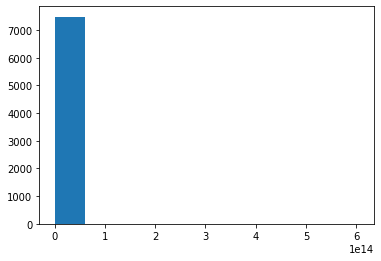

In [ ]:
# Some summary statistics

from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(df['as'])

(array([4010.,  638.,  372.,  240.,  221.,  180.,  126.,  113.,   89.,
          76.,   70.,   61.,   52.,   57.,   45.,   42.,   48.,   32.,
          43.,   26.,   27.,   27.,   24.,   26.,   22.,   14.,   17.,
          14.,   14.,  765.]),
 array([0.00000000e+00, 4.25244767e+08, 8.50489533e+08, 1.27573430e+09,
        1.70097907e+09, 2.12622383e+09, 2.55146860e+09, 2.97671337e+09,
        3.40195813e+09, 3.82720290e+09, 4.25244767e+09, 4.67769243e+09,
        5.10293720e+09, 5.52818197e+09, 5.95342673e+09, 6.37867150e+09,
        6.80391627e+09, 7.22916103e+09, 7.65440580e+09, 8.07965057e+09,
        8.50489533e+09, 8.93014010e+09, 9.35538487e+09, 9.78062963e+09,
        1.02058744e+10, 1.06311192e+10, 1.10563639e+10, 1.14816087e+10,
        1.19068535e+10, 1.23320982e+10, 1.27573430e+10]),
 <BarContainer object of 30 artists>)

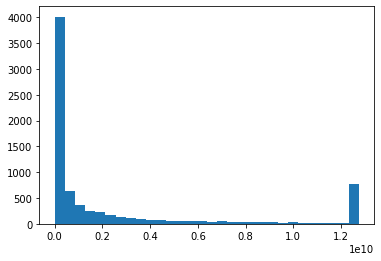

In [ ]:
# Winsorize
try:
    from scipy.stats.mstats import winsorize
except:
    !pip install scipy
    from scipy.stats.mstats import winsorize

lower  = df['as'].quantile(0.00)
upper  = df['as'].quantile(0.90)

assets = df['as'].apply(lambda x: upper if x > upper else lower if x < lower else x )

plt.hist(assets, bins = 30)
